In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import matplotlib
import scipy.stats as sps
import pandas as pd
import cupy as cp
from scipy.stats import norm, chi2
%matplotlib widget

# Plotting format for thesis
plt.rc('font', family='serif')
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.rc('axes', titlesize=16, labelsize=16)
plt.rc('legend', fontsize=14)
plt.rc('figure', titlesize=18)

Fit parameters: a = 1.0000050040455755, b = 0.42994620933320615


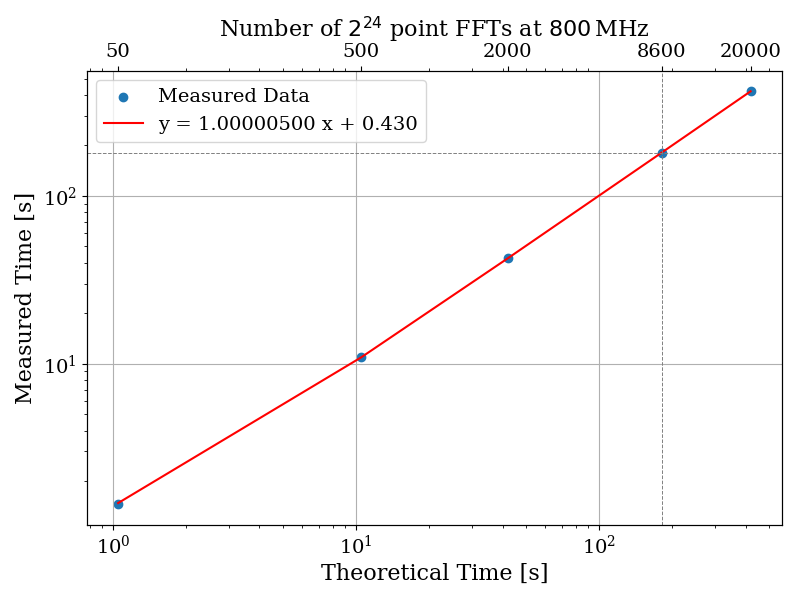

In [3]:
# DAQ efficiency 
# Data taken randomly on may 16 2024. 800MHz sample rate 2^24pt
theoryTime = [1.0486, 10.485, 41.943, 180.3551, 419.4304]
measuredTime = [1.4616, 10.936, 42.3741,180.7782, 419.8652]


# Define a linear function for fitting
def linear_fit(x, a, b):
    return a * x + b

# Perform the curve fit
params, params_covariance = curve_fit(linear_fit, theoryTime, measuredTime)

# Print fit parameters
print(f"Fit parameters: a = {params[0]}, b = {params[1]}")

# Generate data for the fit line
fit_line = linear_fit(np.array(theoryTime), *params)

# Calculate number of FFTs
sample_rate = 800e6
fft_points = 2**24
fft_time = fft_points / sample_rate
num_ffts = [time / fft_time for time in theoryTime]

# Plot data and fit

fig, ax1 = plt.subplots(figsize=(8, 6))

ax1.scatter(theoryTime, measuredTime, label='Measured Data')
ax1.plot(theoryTime, fit_line, label=f'y = {params[0]:.8f} x + {params[1]:.3f}', color='red')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel('Theoretical Time [s]')
ax1.set_ylabel('Measured Time [s]')
ax1.legend()
ax1.grid()


# Add a second x-axis
ax2 = ax1.twiny()
ax2.set_xscale('log')
ax2.set_xlim(ax1.get_xlim())
ax2.set_xlabel(r'Number of $2^{24}$ point FFTs at $800\,$MHz')
ax2.set_xticks(theoryTime)
ax2.set_xticklabels([f'{n:.0f}' for n in num_ffts])

plt.tight_layout()

# Highlight the 4th data point
index = 3
ax1.axvline(x=theoryTime[index], color='gray', linestyle='--', linewidth=0.7)
ax1.axhline(y=measuredTime[index], color='gray', linestyle='--', linewidth=0.7)


plt.show()



In [5]:
from datetime import datetime

# Define the two datetime strings
datetime1_str = "2023-05-10 12:32:48.365161"
datetime2_str = "2023-05-19 09:37:27.766278"

# Run 1B.1
datetime1_str = "2023-09-13 16:32:41.333603"
datetime2_str = "2023-09-22 13:03:27.603712"

# Convert the strings to datetime objects
datetime1 = datetime.strptime(datetime1_str, "%Y-%m-%d %H:%M:%S.%f")
datetime2 = datetime.strptime(datetime2_str, "%Y-%m-%d %H:%M:%S.%f")

# Perform the subtraction
difference = datetime2 - datetime1
difference

# enter into wolfram based on output
#((4176 - (4176/16)) * (2^24/800MHz * 8600)) /( 8 days + 3 minutes +75879 seconds)


datetime.timedelta(days=8, seconds=73846, microseconds=270109)

Text(-15.777777777777784, 0.5, 'Noise Temp of Cascaded System [K]')

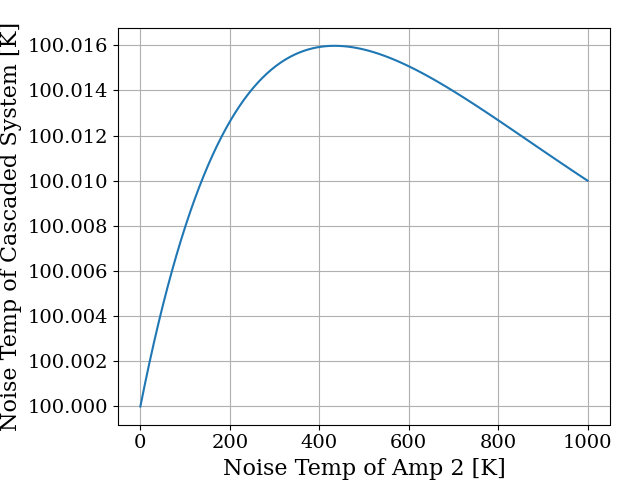

In [4]:
#not used
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


#Friis plot
G1 = np.linspace(40,50,100) #dB
G1 = 10**(G1/10)
T1 = 100 #K
T2 = np.linspace(0, 1000, 100) #K

def tempToF(T,T0 = 290):
    return 1+(T/T0)

def friis(G1, F1, F2):
    F1 = tempToF(T1)
    F2 = tempToF(T2)
    return F1 + ((F2-1)/G1)

def fToTemp(F, T0 = 290):
    return((F-1)*T0)

plt.close('all')
plt.figure()
plt.plot(T2, fToTemp(friis(G1, T1, T2)))
plt.grid()
plt.tight_layout(pad = 2)
plt.xlabel('Noise Temp of Amp 2 [K]')
plt.ylabel('Noise Temp of Cascaded System [K]')



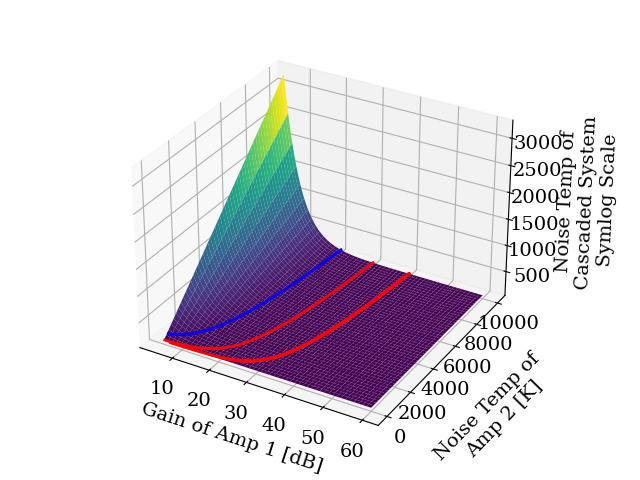

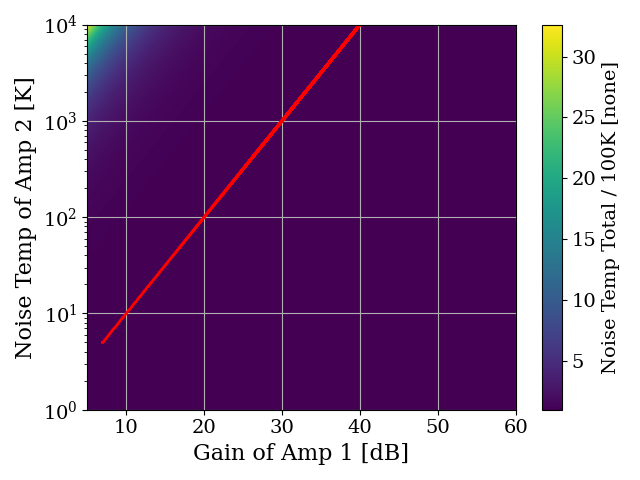

In [5]:
#cascade NF
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LogNorm


# Define parameters
G1 = np.linspace(5, 60, 5000)  # Gain in dB
T1 = 100  # K
T2 = np.linspace(1, 10000, 5000)  # Noise temperature in K

# Convert gain from dB to linear scale
G1_linear = 10**(G1/10)

# Create meshgrid for G1 and T2
G1_grid, T2_grid = np.meshgrid(G1_linear, T2)

# Define functions
def tempToF(T, T0=290):
    return 1 + (T / T0)

def friis(G1, T1, T2):
    F1 = tempToF(T1)
    F2 = tempToF(T2)
    return F1 + ((F2 - 1) / G1)

def fToTemp(F, T0=290):
    return (F - 1) * T0

# Calculate Friis noise temperature
friis_temp = fToTemp(friis(G1_grid, T1, T2_grid)) - 0

# Plotting
plt.close('all')
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(10*np.log10(G1_grid), T2_grid, friis_temp, cmap='viridis')
#ax.plot_surface(10*np.log10(G1_grid), T2_grid, np.full_like(G1_grid, fill_value=10), color='r', alpha=0.5)
'''
# Find intersection points and plot
G1_log = 10 * np.log10(G1_grid)
intersection_indices = np.abs(friis_temp - 1) < 1e-2

G1_intersection = G1_log[intersection_indices]
T2_intersection = T2_grid[intersection_indices]
z_intersection = friis_temp[intersection_indices]
'''

G1_log = 10 * np.log10(G1_grid)

# Find and plot intersections at 1, 10, and 100
colors = ['r', 'r', 'b']  # Define colors for each intersection value
intersection_values = [101, 110, 180]

for value, color in zip(intersection_values, colors):
    intersection_indices = np.abs(friis_temp - value) < 1e-2
    G1_intersection = G1_log[intersection_indices]
    T2_intersection = T2_grid[intersection_indices]
    z_intersection = friis_temp[intersection_indices]
    ax.plot(G1_intersection, T2_intersection, z_intersection, color+'-', linewidth=2, zorder=100, label=f'Intersection at {value}')



ax.plot(G1_intersection, T2_intersection, z_intersection, 'k-', linewidth=2, zorder = -100)

# Labels and title
ax.set_xlabel('Gain of Amp 1 [dB]', labelpad=6, fontsize=14)
ax.set_ylabel('Noise Temp of \nAmp 2 [K]', labelpad=14, fontsize=14)
ax.set_zlabel('Noise Temp of \nCascaded System \nSymlog Scale', labelpad=14, fontsize=14)
ax.yaxis.set_tick_params(pad = 0)
#ax.set_zscale('symlog')
#ax.legend(loc ='upper right', fontsize = 12)
plt.tight_layout(pad=2)
plt.grid()

plt.show()

# Additional 2D histogram plot
fig2, ax2 = plt.subplots()

# Plot 2D histogram
hist = ax2.hist2d(10*np.log10(G1_grid.flatten()), T2_grid.flatten(), bins=50, cmin=1, cmap='viridis')

# Overlay the noise temperature as a color mesh
#mesh = ax2.pcolormesh(10*np.log10(G1_grid), T2_grid, friis_temp, shading='auto', cmap='viridis')
mesh = ax2.pcolormesh(10*np.log10(G1_grid), (T2_grid), friis_temp/T1, shading='auto', cmap='viridis')

cbar = plt.colorbar(mesh, ax=ax2, )
cbar.set_label('Noise Temp Total / 100K [none]', fontsize = 14)


# Add a curve where the noise temp is approximately 101K
tempCurve = 101
approx_101_indices = (friis_temp > tempCurve-0.01) & (friis_temp < tempCurve+0.01)
#approx_101_indices = (friis_temp < tempCurve-0.01) 
G1_approx_101 = 10 * np.log10(G1_grid[approx_101_indices])
T2_approx_101 = T2_grid[approx_101_indices]

ax2.plot(G1_approx_101, T2_approx_101, 'r-', linewidth=2, alpha = 1)


# Labels and title
ax2.set_xlabel('Gain of Amp 1 [dB]')
ax2.set_ylabel('Noise Temp of Amp 2 [K]')
ax2.set_yscale('log')
ax2.grid()

plt.tight_layout()
plt.show()




/tmp/ipykernel_299318/1643049919.py:16: RuntimeWarning: overflow encountered in exp
  return np.sqrt(eta * 8 * np.pi * h * nu**3/(c**2)* 1/(np.exp(h*nu/(k*temperature))-1))


red
orange
green
blue
purple


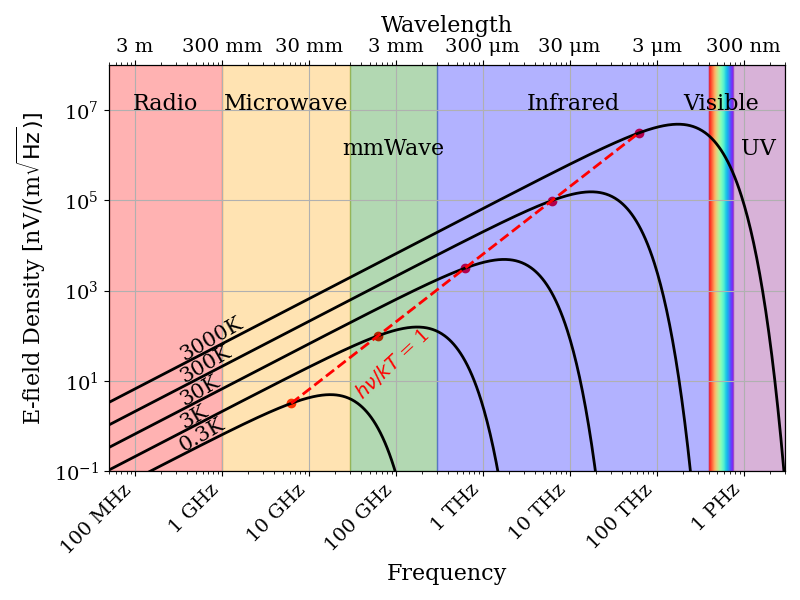

In [7]:
#black body E field plot

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter

# Constants
h = 6.626e-34  # Planck's constant in J*s
k = 1.381e-23  # Boltzmann constant in J/K
c = 3e8        # Speed of light in m/s

# Define the blackbody radiation function
def blackbody_radiation(nu, temperature):
    """Calculate blackbody radiation as a function of wavelength and temperature.""" 
    eta = 377 # Ohms
    return np.sqrt(eta * 8 * np.pi * h * nu**3/(c**2)* 1/(np.exp(h*nu/(k*temperature))-1))

# Define the range of freqs (in Hz)
nu = np.logspace(7, 15.7, 1000)  # from 1 nm to 3 µm

# Temperature in Kelvin
temperature = 300

# Calculate the blackbody radiation
EperRtHz = blackbody_radiation(nu, temperature)

tempList = [0.3, 3, 30 ,300,3000]

plt.close('all')
# Plot the blackbody radiation curve
fig, ax1 = plt.subplots(figsize=(8, 6))

for temp in tempList:
    ax1.plot(nu, blackbody_radiation(nu, temperature=temp) / 1e-9, label=f'T = {temp}K', linewidth=2, color='k') 
    ypos = blackbody_radiation(1e9, temperature=temp) / 1e-9  # label position in y
    ax1.text(3e8, ypos + (-.65 * ypos), s=f'{temp}K', rotation=30, fontsize=15, verticalalignment='bottom')

# Add the line for h nu = kT
critical_freqs = [k * temp / h for temp in [0.3, 3, 30 ,300,3000]]
critEfield = []
for critFreq, critTemp in zip(critical_freqs, tempList):
    critEfield.append(blackbody_radiation(critFreq, temperature=critTemp))
    ax1.scatter(critFreq, blackbody_radiation(critFreq, temperature=critTemp) / 1e-9, marker='o', color='r')
plt.plot(critical_freqs, np.asarray(critEfield)/1e-9, 'r--', linewidth = 2)
plt.text(3e10, 4,r'$h\nu/kT$ = 1', color = 'r', fontsize = 14, rotation = 43)


ax1.set_xlabel('Frequency')
ax1.set_ylabel(r'E-field Density [nV/(m$\sqrt{\mathrm{Hz}})]$')
ax1.grid(True)
ax1.loglog()
ax1.set_ylim(.1, 100000000)
ax1.set_xlim(5e7, 3e15)

# Add shaded regions for different wavelength ranges
wavelengths = {
    'Radio': (5e7, 1e9),
    'Microwave': (1e9, 30e9),
    'mmWave': (30e9, 300e9),
    'Infrared': (300e9, 4e14),
    'Visible': (4e14, 7.5e14),
    'UV': (7.5e14, 3e15),
}

colors = {
    'Radio': 'red',
    'Microwave': 'orange', 
    'mmWave' : 'green',
    'Infrared': 'blue',
    'Visible': None,  # Optical will be handled separately
    'UV': 'purple',
}

label_heights = {
    'Radio': 1e7,
    'Microwave': 1e7,
    'mmWave' : 1e6,
    'Infrared': 1e7,
    'Visible': 1e7,
    'UV': 1e6,
}

for label, (start, end) in wavelengths.items():
    if label == 'Visible':
        # Add reversed rainbow gradient for Optical region
        cmap = plt.get_cmap('rainbow')
        num_colors = 100  # Number of color segments
        frequencies = np.logspace(np.log10(start), np.log10(end), num_colors)
        for i in range(num_colors - 1):
            ax1.axvspan(frequencies[i], frequencies[i + 1], color=cmap((num_colors - i) / num_colors), alpha=0.3)
    else:
        print(colors[label])
        ax1.axvspan(start, end, color=colors[label], alpha=.3, label=label)
    
    ax1.text(np.exp((np.log(start) + np.log(end)) / 2), label_heights[label], label,
             horizontalalignment='center', rotation=0, fontsize=16)

# Function to format the x-axis labels
def format_func(value, tick_number):
    if value == 0:
        return "0"
    if value < 1e6:
        return f'{value / 1e3:.0f} kHz'
    elif value < 1e9:
        return f'{value / 1e6:.0f} MHz'
    elif value < 1e12:
        return f'{value / 1e9:.0f} GHz'
    elif value < 1e15:
        return f'{value / 1e12:.0f} THz'
    else:
        return f'{value / 1e15:.0f} PHz'

# Apply the formatter to the x-axis
ax1.xaxis.set_major_formatter(FuncFormatter(format_func))
plt.xticks(rotation=45, horizontalalignment='right')

# Create a second x-axis for wavelength
ax2 = ax1.twiny()

# Convert frequency to wavelength
#new_ticks = np.array([1e15, 1e14, 1e13, 1e12, 1e11, 1e10, 1e9, 1e8, 1e7])
new_ticks = np.array([1])
ax2.set_xlim(ax1.get_xlim())
ax2.set_xticks(new_ticks)
ax2.set_xscale('log')

# Function to format the wavelength labels
def wavelength_func(value, tick_number):
    if value == 0:
        return "0"
    wavelength = c / value
    if wavelength < 1e-9:
        return f'{wavelength * 1e12:.0f} pm'
    elif wavelength < 1e-6:
        return f'{wavelength * 1e9:.0f} nm'
    elif wavelength < 1e-3:
        return f'{wavelength * 1e6:.0f} μm'
    elif wavelength < 1:
        return f'{wavelength * 1e3:.0f} mm'
    else:
        return f'{wavelength:.0f} m'

# Apply the formatter to the second x-axis
ax2.xaxis.set_major_formatter(FuncFormatter(wavelength_func))
ax2.set_xlabel('Wavelength')

plt.tight_layout()
plt.show()


In [84]:
##Thermal noise voltage to PSD
 
# # thermal noise E-field [V/m/sqrt(Hz)]
# input voltage [V/sqrt(Hz)]
# output voltage //
# output power, one acquition [W/Hz]
#  

 # Parameters


N = 2**10  # Number of samples
Fs = 800e6    # Sampling frequency (Hz)
T = 1.0 / Fs # Sampling interval

p_sig = .0000  # power of signal [W]
p_noise = 10**(-20.4) * Fs/2   #W, Total ie S * Fs
f = 50e6       # Frequency of the sine wave (Hz)
Z = 50 #Ohms
numAvg = 1


# Generate sine wave
V_peak = np.sqrt(p_sig*Z*2) #2 converts from RMS to peak 
V_noise = np.sqrt(p_noise*Z)

gpu = 1

if gpu: 
        # Convert time array to CuPy array
    t = cp.linspace(0.0, N*T, N, endpoint=False)

    # Averaging on GPU
    powSpec = cp.zeros(N//2)
    totalPowerList = []

    for i in range(numAvg):
        # Generate noise, build signal
        V_record = (
            V_peak * cp.sin(2.0 * cp.pi * f * t) 
            + cp.random.normal(0, V_noise, len(t))
        )
        
        # Perform FFT
        yf = cp.fft.rfft(V_record)
        
        totalPower = 2/N**2/Z * cp.sum(cp.abs(yf[:N//2])**2)
        totalPowerList.append(totalPower.get())  # Transfer only the final total power to the CPU
        
        if i % 100 == 0:
            print(i)
        
        # Normalize the FFT output to power spec
        powSpec += 2/N**2/Z * (cp.abs(yf[:N//2])**2)  # W/Hz

    # Transfer the final power spectrum back to CPU for plotting
    powSpec = cp.asnumpy(powSpec)
    V_record= cp.asnumpy(V_record)
    t= cp.asnumpy(t)
else:
    # Generate noisey signal wave
    t = np.linspace(0.0, N*T, N, endpoint=False)



    #averging
    powSpec = np.zeros(N//2)
    totalPowerList= []
    for i in range(numAvg):
        # Generate noise, build signal
        V_record = (
            V_peak * np.sin(2.0 * np.pi * f * t) 
            + np.random.normal(0, V_noise, len(t))
        )
        # Perform FFT
        yf = np.fft.rfft(V_record)
        totalPower = 2/N**2/Z * (np.abs(yf[:N//2])**2).sum()
        totalPowerList.append(totalPower)
        #print(f'total power = {totalPower}')
        if i % 100 == 0:
            print(i)
        # Normalize the FFT output to power spec
        powSpec += 2/N**2/Z * (np.abs(yf[:N//2])**2) #W/Hz
powSpec /= numAvg

# Plot the results

plt.close('all')


# Time domain plot
if 0:
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
    ax1.plot(t*1e6, V_record)
    ax1.set_title('Time Domain Signal')
    ax1.set_xlabel(r'Time [$\mu$s]')
    ax1.set_ylabel('Amplitude [V]')
    ax1.grid()

    # Frequency domain plot 
    freqs = np.linspace(0, Fs/2/1e6, N//2) #MHz
    ax2.plot(freqs, (powSpec))
    ax2.set_title('Frequency Domain (FFT)')
    ax2.set_xlabel('Frequency [MHz]')
    ax2.set_ylabel(r'Power Spectral Density [W/$\Delta \nu_\mathrm{RF}$]')
    ax2.grid()

    plt.tight_layout()
    plt.show()

if 0:
    plt.figure()
    plt.plot(t*1e6, V_record*1e6)
    plt.xlabel(r'Time [$\mu$s]')
    plt.ylabel(r'Measured Volatage [$\mu$V]')
    plt.grid()
    plt.tight_layout()
    plt.show()

print(f'total integrated noise power (therory) = {p_noise}')
print(f'total integrated power = {powSpec.sum()}')
print(f'mean power(per bin) = {np.mean(powSpec)}')
print(f'mean power(per bin)*num bins = {np.mean(powSpec)*N/2}')

0
total integrated noise power (therory) = 1.5924286822139943e-12
total integrated power = 1.560155141523968e-12
mean power(per bin) = 3.047178010789e-15
mean power(per bin)*num bins = 1.560155141523968e-12


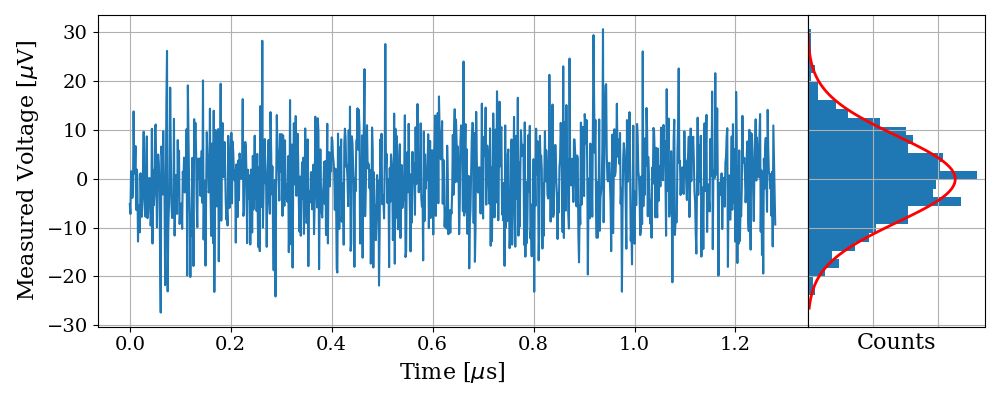

8.834028344258082 uV
mean = -0.08821074814023722 uV


In [85]:
#plot above
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import numpy as np
import cupy as cp
from scipy.stats import norm

# Ensure V_record is a NumPy array for plotting
V_record = cp.asnumpy(V_record)
t = cp.asnumpy(t)

# Create a figure with GridSpec to place the histogram on the right
fig = plt.figure(figsize=(10, 4))
gs = GridSpec(1, 2, width_ratios=[4, 1], wspace=0)

# Time domain plot on the left
ax1 = fig.add_subplot(gs[0])
ax1.plot(t * 1e6, V_record * 1e6)  # Convert CuPy array 't' to NumPy array for plotting
ax1.set_xlabel(r'Time [$\mu$s]')
ax1.set_ylabel(r'Measured Voltage [$\mu$V]')
ax1.grid()

# Histogram on the right
ax2 = fig.add_subplot(gs[1], sharey=ax1)

# Calculate the number of bins using the square-root choice
number_of_bins = int(np.ceil(np.sqrt(len(V_record))))
hist_data, bins, _ = ax2.hist(V_record * 1e6, bins=number_of_bins, orientation='horizontal', density=True)

# Fit a Gaussian to the histogram data
bin_centers = (bins[:-1] + bins[1:]) / 2
mu, std = norm.fit(V_record * 1e6)

# Plot the best-fit Gaussian
x = np.linspace(bin_centers.min(), bin_centers.max(), 100)
p = norm.pdf(x, mu, std)
ax2.plot(p, x, 'r-', linewidth=2)

# Remove ticks from the histogram
ax2.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelleft=False, labelbottom=False)

ax2.set_xlabel('Counts')
ax2.grid()

plt.tight_layout()
plt.show()
print(f'{np.std(V_record*1e6)} uV')
print(f'mean = {np.mean(V_record*1e6)} uV')

X^2 parameters (loc, scale) = (-3.389868735399691e-16, 4.147902640244835e-14) [W] not in pW!!!!


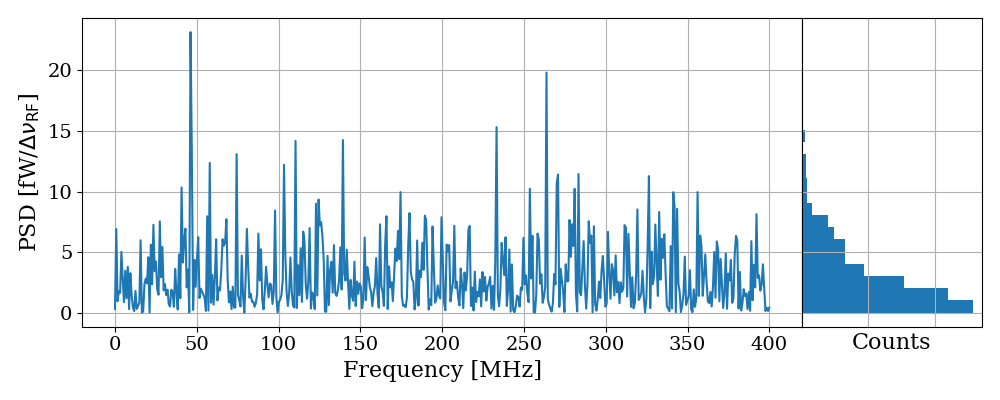

In [86]:
if numAvg!= 1:
    # Frequency domain plot with Gaussian fit
    fig = plt.figure(figsize=(10, 4))
    gs = GridSpec(1, 2, width_ratios=[4, 1], wspace=0)

    # Frequency domain plot on the left
    ax1 = fig.add_subplot(gs[0])
    freqs = np.linspace(0, Fs/2/1e6, N//2) # MHz
    ax1.plot(freqs, powSpec*1e15)
    ax1.set_title('Frequency Domain (FFT)')
    ax1.set_xlabel('Frequency [MHz]')
    ax1.set_ylabel(r'PSD [fW/$\Delta \nu_\mathrm{RF}$]')
    ax1.grid()

    # Histogram on the right
    ax2 = fig.add_subplot(gs[1], sharey=ax1)

    # Calculate the number of bins using the square-root choice
    number_of_bins = int(np.ceil(np.sqrt(len(powSpec))))
    hist_data, bins, _ = ax2.hist(powSpec*1e15, bins=number_of_bins, orientation='horizontal', density=True)

    # Fit a Gaussian to the histogram data
    bin_centers = (bins[:-1] + bins[1:]) / 2
    mu, std = norm.fit(powSpec*1e15)
    print(f'mu = {mu}')
    print(f'sigma = {std}')
    # Plot the best-fit Gaussian
    x = np.linspace(bin_centers.min(), bin_centers.max(), 100)
    p = norm.pdf(x, mu, std)
    ax2.plot(p, x, 'r-', linewidth=2)

    # Remove ticks from the histogram
    ax2.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelleft=False, labelbottom=False)

    ax2.set_xlabel('Counts')
    ax2.grid()

    plt.tight_layout()
    plt.show()

else:
    # Frequency domain plot with Chi-Squared fit (1 degree of freedom)
    fig = plt.figure(figsize=(10, 4))
    gs = GridSpec(1, 2, width_ratios=[4, 1], wspace=0)

    # Frequency domain plot on the left
    ax1 = fig.add_subplot(gs[0])
    freqs = np.linspace(0, Fs/2/1e6, N//2) # MHz
    ax1.plot(freqs, powSpec*1e15)

    ax1.set_xlabel('Frequency [MHz]')
    ax1.set_ylabel(r'PSD [fW/$\Delta \nu_\mathrm{RF}$]')
    ax1.grid()

    # Histogram on the right
    ax2 = fig.add_subplot(gs[1], sharey=ax1)

    # Calculate the number of bins using the square-root choice
    number_of_bins = int(np.ceil(np.sqrt(len(powSpec))))
    hist_data, bins, _ = ax2.hist(powSpec*1e15, bins=number_of_bins, orientation='horizontal', density=True)

    # Fit a Chi-Squared distribution to the histogram data
    bin_centers = (bins[:-1] + bins[1:]) / 2
    df = 1
    chi2_params = chi2.fit(powSpec, df)
    print(f'X^2 parameters (loc, scale) = {chi2_params[1:]} [W] not in pW!!!!')

    # Plot the best-fit Chi-Squared
    x = np.linspace(bin_centers.min(), bin_centers.max(), 100)
    p = chi2.pdf(x, df, *chi2_params[1:])
    #ax2.plot(p, x, 'r-', linewidth=2)

    # Remove ticks from the histogram
    ax2.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelleft=False, labelbottom=False)

    ax2.set_xlabel('Counts')
    ax2.grid()

    plt.tight_layout(pad=1.3)
    plt.show()

Average 0/4
Average 0/16
Average 0/64
Average 0/256
Average 100/256
Average 200/256
Average 0/1012
Average 100/1012
Average 200/1012
Average 300/1012
Average 400/1012
Average 500/1012
Average 600/1012
Average 700/1012
Average 800/1012
Average 900/1012
Average 1000/1012


/tmp/ipykernel_21753/2202758185.py:99: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


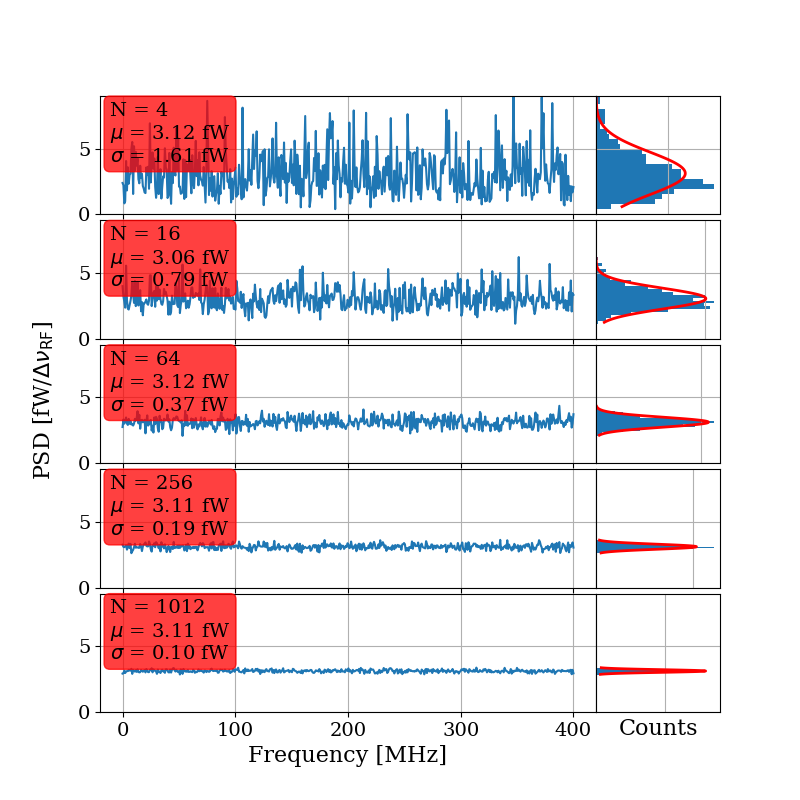

In [87]:
#x^2 to gaussian 

import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from matplotlib.gridspec import GridSpec

# Define the parameters
N = 2**10  # Number of samples
Fs = 800e6  # Sampling frequency (Hz)
T = 1.0 / Fs  # Sampling interval

p_sig = .0000  # power of signal [W]
p_noise = 10**(-20.4) * Fs/2  # W, Total ie S * Fs
f = 50e6  # Frequency of the sine wave (Hz)
Z = 50  # Ohms
numAvgList = [4, 16, 64, 256, 1012]  # List of number of averages

# Generate time array
t = np.linspace(0.0, N*T, N, endpoint=False)

# Create a figure with subplots
fig = plt.figure(figsize=(8, 8))
gs = GridSpec(5, 2, width_ratios=[4, 1], hspace=0.05, wspace=0)

# Iterate over the list of number of averages
for idx, numAvg in enumerate(numAvgList):
    # Averaging
    powSpec = np.zeros(N//2)
    totalPowerList = []

    for i in range(numAvg):
        # Generate noise, build signal
        V_record = (
            np.sqrt(p_sig*Z*2) * np.sin(2.0 * np.pi * f * t) 
            + np.random.normal(0, np.sqrt(p_noise*Z), len(t))
        )
        
        # Perform FFT
        yf = np.fft.rfft(V_record)
        
        totalPower = 2/N**2/Z * np.sum(np.abs(yf[:N//2])**2)
        totalPowerList.append(totalPower)  # Store total power
        
        if i % 100 == 0:
            print(f'Average {i}/{numAvg}')
        
        # Normalize the FFT output to power spec
        powSpec += 2/N**2/Z * (np.abs(yf[:N//2])**2)  # W/Hz

    # Normalize the power spectrum by the number of averages
    powSpec /= numAvg

    # Frequency domain plot
    freqs = np.linspace(0, Fs/2/1e6, N//2)  # MHz
    ax1 = fig.add_subplot(gs[idx, 0])
    ax1.plot(freqs, powSpec * 1e15)
    ax1.grid()
    if idx == len(numAvgList) - 1:
        ax1.set_xlabel('Frequency [MHz]')
    else:
        ax1.tick_params(labelbottom=False)

    # Add text box with title, mean, and std
    mu, std = norm.fit(powSpec * 1e15)
    textstr = f'N = {numAvg}\n$\\mu$ = {mu:.2f} fW\n$\\sigma$ = {std:.2f} fW'



    ax1.text(0.02, 0.95, textstr, transform=ax1.transAxes, fontsize=14,
             verticalalignment='top', bbox=dict(boxstyle='round', alpha=.75, color = 'red'))

    # Histogram on the right
    ax2 = fig.add_subplot(gs[idx, 1], sharey=ax1)
    
    # Calculate the number of bins using the square-root choice
    number_of_bins = int(np.ceil(np.sqrt(len(powSpec))))
    hist_data, bins, _ = ax2.hist(powSpec * 1e15, bins=number_of_bins, orientation='horizontal', density=True)
    
    # Fit a Gaussian to the histogram data
    bin_centers = (bins[:-1] + bins[1:]) / 2
    
    # Plot the best-fit Gaussian
    x = np.linspace(bin_centers.min(), bin_centers.max(), 100)
    p = norm.pdf(x, mu, std)
    ax2.plot(p, x, 'r-', linewidth=2)
    ax2.set_ylim(0,9)
    
    # Remove ticks from the histogram
    ax2.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelleft=False, labelbottom=False)
    
    if idx == len(numAvgList) - 1:
        ax2.set_xlabel('Counts')
    ax2.grid()

# Set common y-axis label
fig.text(0.04, 0.5, r'PSD [fW/$\Delta \nu_\mathrm{RF}$]', va='center', rotation='vertical', fontsize = 16)

plt.tight_layout()
plt.show()


In [89]:
#this is really in system design section ie ch3
from scipy.interpolate import interp1d

# Load data from the text file
filename = './comPowerAF10m.txt'
data_from_file = np.loadtxt(filename, delimiter=',')
AF_freqs = data_from_file[:, 0]
AF = data_from_file[:, 1]

fileName         = '/drBiggerBoy/run1p4/plottingSpec/chA_avg_W_switch1.npy' 
freqs       = np.linspace(0,400,2**23+1)[1:-1]
data = np.load(fileName)[1:-1]


# Interpolating the Antenna Factor
AF_interp = np.interp(freqs, AF_freqs, 10**(AF/20))
#plt.plot(freqs, AF_interp)


# Conversion function from dBm to V/m with interpolated antenna factor
def V_per_m_to_dBm(Vpm):
    volt = Vpm/AF_interp 
    powerW = volt**2/50
    powerdBm = 10*np.log10(powerW*1000)
    return powerdBm



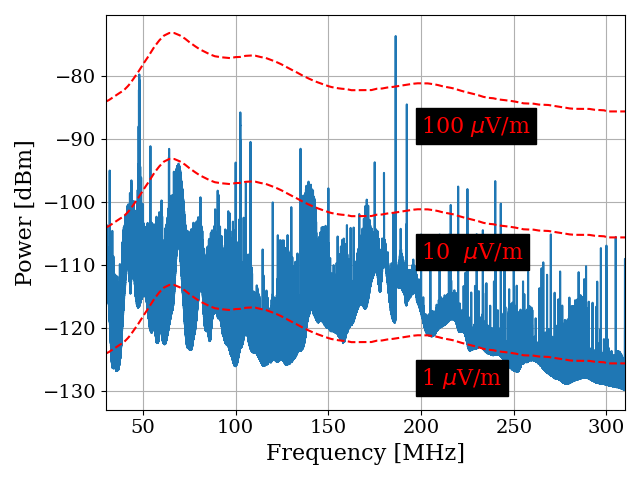

In [90]:
plt.close('all')
# Plotting the original data
plt.plot(freqs, 10 * np.log10(data * 1000), label='Power [dBm]')
plt.xlabel('Frequency [MHz]')
plt.ylabel('Power [dBm]')
plt.grid(True)


# Reference lines in dBm
field_strength_values = [1e-4,1e-5,1e-6]

for Vpm in field_strength_values:
    dBm = V_per_m_to_dBm(Vpm)
    plt.plot(freqs, dBm, 'r--')

#plt.text(275, -73.5 , f'1 mV/m', fontsize=16, color='r', verticalalignment='bottom', backgroundcolor='black')
plt.text(200, -90 , r'100 $\mu$V/m', fontsize=16, color='r', verticalalignment='bottom', backgroundcolor='black')
plt.text(200, -110 , r'10  $\mu$V/m', fontsize=16, color='r', verticalalignment='bottom', backgroundcolor='black')
plt.text(200, -130 , r'1 $\mu$V/m', fontsize=16, color='r', verticalalignment='bottom', backgroundcolor='black')


plt.tight_layout()
plt.xlim(30,310)
plt.show()

brick wall effective bandwidth = 250.0000000549
MC effective bandwidth = 237.05753492392233


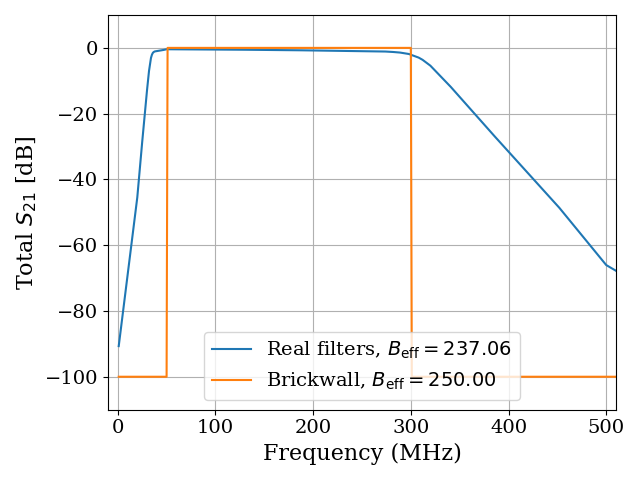

In [6]:
#band pass filter effective bandwidth


import numpy as np
from scipy.interpolate import interp1d
from scipy.integrate import simps
import matplotlib.pyplot as plt

# Given data from data sheets
hpfFreqs = [10.00, 20.00, 22.00, 24.00, 26.00, 28.00, 30.00, 32.00, 34.00, 35.00, 36.00, 37.00, 38.00, 39.00, 40.00, 41.00, 42.00, 43.00, 44.00, 45.00, 50.00, 100.00, 200.00, 300.00, 400.00, 500.00, 600.00, 650.00, 700.00, 750.00, 800.00]
hpfIl = [69.20, 45.38, 38.53, 31.83, 25.35, 18.94, 12.65, 6.90, 2.95, 1.94, 1.35, 1.09, 0.94, 0.89, 0.82, 0.77, 0.72, 0.69, 0.65, 0.61, 0.26, 0.24, 0.26, 0.29, 0.32, 0.37, 0.40, 0.41, 0.44, 0.46, 0.46]

lpfFreqs = [1, 20, 74, 168, 272, 278, 288, 298, 308, 312, 320, 340, 380, 400, 450, 500, 550, 1000, 1250, 1500]
lpfIl = [0.05, 0.10, 0.20, 0.40, 0.80, 0.88, 1.09, 1.57, 2.66, 3.33, 5.11, 11.26, 24.68, 31.23, 47.55, 65.66, 74.39, 71.19, 64.69, 73.36]


# Common frequency grid
freqs = np.linspace(1, 800, 800)

# Interpolation functions
hpf_interp_func = interp1d(hpfFreqs, hpfIl, kind='linear', fill_value="extrapolate")
lpf_interp_func = interp1d(lpfFreqs, lpfIl, kind='linear', fill_value="extrapolate")

# Interpolated data
hpf_interp = hpf_interp_func(freqs)
lpf_interp = lpf_interp_func(freqs)

totalIl = hpf_interp+lpf_interp
brickWallIl = np.full(800, 100)
brickWallIl[50:300] = 0

mcEffB                 = simps(10**((-totalIl)/10), freqs)
brickWallEffB          = simps(10**((-brickWallIl)/10), freqs)

print(f'brick wall effective bandwidth = {brickWallEffB}')
print(f'MC effective bandwidth = {mcEffB}')

plt.close('all')
# Plotting the results
if 0:
    plt.figure()
    plt.plot(freqs, totalIl)
    plt.xlabel('Frequency (MHz)')
    plt.ylabel('Insertion Loss (dB)')
    plt.title('Interpolated Insertion Loss for HPF and LPF')
    plt.legend()
    plt.grid(True)
    plt.show()

plt.figure()
plt.xlabel('Frequency (MHz)')
plt.ylabel(r'Total $S_{21}$ [dB]')
plt.plot(freqs, ((-totalIl)), label = rf'Real filters, $B_\mathrm{{eff}}={mcEffB:.2f}$')
plt.plot(freqs, ((-brickWallIl)), label = rf'Brickwall, $B_\mathrm{{eff}}={brickWallEffB:.2f}$')
#plt.fill_between(freqs, -totalIl, np.full(len(freqs),-200),  alpha=0.3, color='red', hatch = '//')
#plt.fill_between(freqs, -brickWallIl,np.full(len(freqs),-200), alpha=0.3, color='green', hatch = '\\')

plt.grid()
plt.xlim(-10, 510)
plt.ylim(-110, 10)
plt.legend(loc = 'lower center')
plt.tight_layout()

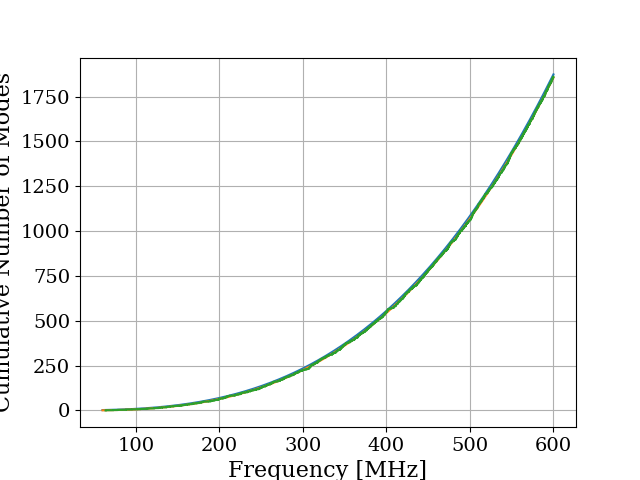

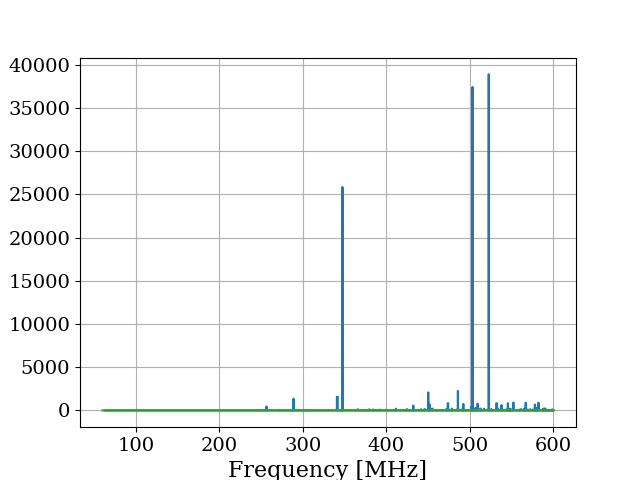

In [77]:
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate Ns (our result) as shown in the first formula
def mode_count_corrected(frequency, a, b, c, v):
    term1 = (8 * np.pi / 3) * a * b * c * (frequency**3) / (v**3)
    term2 = (a + b + c) * (frequency / v)
    return term1 - term2 + 0.5

# Function to calculate N (Weyl's formula) as shown in the second formula
def mode_count_weyl(frequency, a, b, c, v):
    return (8 * np.pi / 3) * a * b * c * (frequency**3) / (v**3)

def dmodeCountdNu(frequency, a, b, c, v):
    return ((8 * np.pi) * a * b * c * (frequency**2) / (v**3)) - (a+b+c)/v

# Physical constants for air (in SI units)
mu_0 = 4 * np.pi * 1e-7  # Vacuum permeability (H/m)
epsilon_0 = 8.854187817e-12  # Vacuum permittivity (F/m)

# Conversion factor from feet to meters
feet_to_meters = 0.3048

# Cavity dimensions (converted to meters)
a = 3.684
b = 2.467 
c = 3.0697 
'''
#jre
a = 0.875
b = 0.725 
c = 0.660

#nist

a = 2.74
b = 3.05
c = 4.57
#cube 
a = 3.3676
b = a
c = a'''
# Calculate speed of light in the cavity
cavity_speed_of_light = 2.99792458E8#1 / np.sqrt(mu_0 * epsilon_0)

# Define the maximum frequency to consider (in Hz)
max_frequency = 600e6  # 1 GHz, can adjust as needed
min_frequency = 60e6

# Generate a list of frequencies to evaluate
frequency_range = np.linspace(min_frequency, max_frequency, 1000)

# Calculate the cumulative number of modes below each frequency
cumulative_modes = []

resonant_freq_list = []
# Iterate over each frequency and calculate the number of modes
# Iterate through mode numbers (m, n, p) to find modes below given frequency
for m in range(0, 25):  # Adjust range as needed to capture all modes below max_frequency
    for n in range(0, 25):
        for p in range(0, 25):
            # Calculate the resonant frequency for given mode numbers
            resonant_freq = (cavity_speed_of_light / 2) * np.sqrt((m/a)**2 + (n/b)**2 + (p/c)**2)
            if (m > 0) + (n > 0) + (p > 0) >= 2:
                if resonant_freq < max_frequency:
                    resonant_freq_list.append(resonant_freq)
                    if (m > 0) + (n > 0) + (p > 0) == 3:
                        resonant_freq_list.append(resonant_freq)

sortFreqs = (np.sort(resonant_freq_list))
#sortFreqs = np.insert(sortFreqs, 0 , 50e6)

# Plotting the cumulative number of modes below the given frequency
plt.figure()
plt.plot(frequency_range/ 1e6, mode_count_weyl(frequency_range, a, b, c, cavity_speed_of_light))
plt.plot(frequency_range/ 1e6, mode_count_corrected(frequency_range, a, b, c, cavity_speed_of_light))
plt.step(sortFreqs / 1e6, np.arange(0, len(sortFreqs),1))
plt.xlabel('Frequency [MHz]')
plt.ylabel('Cumulative Number of Modes')
plt.grid()
plt.show()
plt.tight_layout()

import scipy.signal
# Calculate the change in mode count per frequency bin
unique_freqs, mode_counts = np.unique(sortFreqs, return_counts=True)

# Calculate cumulative mode counts for unique frequencies
cumulative_modes_unique = np.cumsum(mode_counts)

# Compute the derivative dN_s/df, avoiding division by zero
dN_df_unique = np.diff(cumulative_modes_unique) / np.diff(unique_freqs)

# Create a new plot for d(N_s)/df
plt.figure()
plt.step(unique_freqs[:-1] / 1e6, dN_df_unique*1e6)
plt.plot(unique_freqs[:-1] / 1e6, scipy.signal.medfilt(dN_df_unique*1e6, 101))
plt.plot(frequency_range/1e6, dmodeCountdNu(frequency_range, a, b, c, cavity_speed_of_light)*1e6 )
plt.xlabel('Frequency [MHz]')
plt.ylabel(r'$\frac{dN_s}{df}$ [Modes/MHz]')
#plt.title('Rate of Change of Mode Count with Frequency')
plt.grid()
plt.show()
plt.semilogy()
plt.tight_layout()


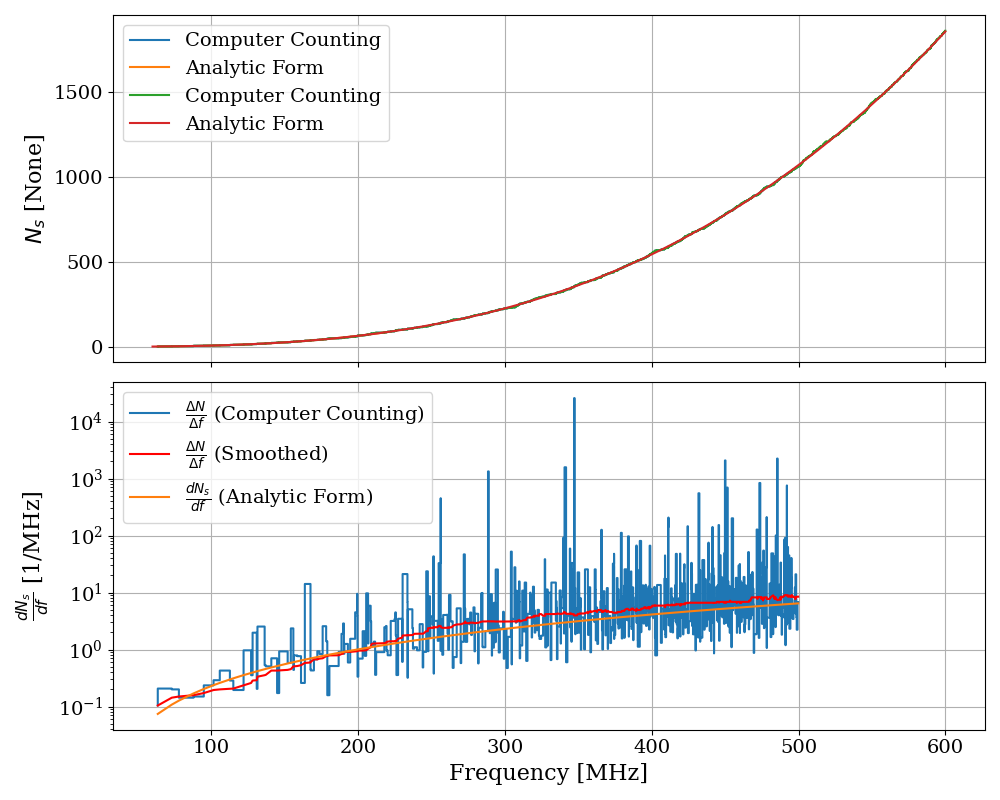

In [78]:



# Create a figure with subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Generate the trim indices based on the length of `sortFreqs`
trim_indices_cumulative = sortFreqs < (max_frequency - 100e6)  # Full array condition for `sortFreqs`

# Trim cumulative count and sorted frequencies accordingly
trimmed_cumulative_modes = np.arange(0, len(sortFreqs), 1)[trim_indices_cumulative]
trimmed_sortFreqs = sortFreqs[trim_indices_cumulative]

# Generate the trim indices for frequency arrays in `dN_df_unique`
trim_indices_freq = unique_freqs[:-1] < (max_frequency - 100e6)  # `unique_freqs[:-1]` used for derivative calculations

# Apply trimming to cumulative plot data
ax1.step(trimmed_sortFreqs / 1e6, trimmed_cumulative_modes, label=r'Computer Counting')
ax1.plot(trimmed_freqs / 1e6, mode_count_corrected(trimmed_freqs, a, b, c, cavity_speed_of_light), label='Analytic Form')


# Top subplot: Cumulative Number of Modes
#ax1.plot(frequency_range / 1e6, mode_count_weyl(frequency_range, a, b, c, cavity_speed_of_light), label="Weyl's Formula")
ax1.step(sortFreqs / 1e6, np.arange(0, len(sortFreqs), 1), label=r'Computer Counting')
ax1.plot(frequency_range / 1e6, mode_count_corrected(frequency_range, a, b, c, cavity_speed_of_light), label='Analytic Form')
ax1.set_ylabel(r'$N_s$ [None]')
ax1.legend()
ax1.grid()

# Bottom subplot: Derivative of Mode Count
unique_freqs, mode_counts = np.unique(sortFreqs, return_counts=True)
cumulative_modes_unique = np.cumsum(mode_counts)
dN_df_unique = np.diff(cumulative_modes_unique) / np.diff(unique_freqs)
filtered_dN_df = scipy.signal.medfilt(dN_df_unique, 101)
# Trim the smoothed data to exclude the last 100 MHz
trimmed_smoothed_dN_df = filtered_dN_df[unique_freqs[:-1] < (max_frequency - 100e6)]
trimmed_freqs = unique_freqs[:-1][unique_freqs[:-1] < (max_frequency - 100e6)]

#ax2.step(unique_freqs[:-1] / 1e6, dN_df_unique * 1e6, label=r'$\frac{\Delta N}{\Delta f}$ (Computer Counting)')
#ax2.plot(trimmed_freqs / 1e6, trimmed_smoothed_dN_df * 1e6, label=r'$\frac{\Delta N}{\Delta f}$ (Smoothed)', color='red')
#ax2.plot(frequency_range / 1e6, dmodeCountdNu(frequency_range,a,b,c,cavity_speed_of_light) * 1e6, label=r'$\frac{dN_s}{df}$ (Analytic Form)')


# Trim each dataset consistently
trimmed_dN_df_unique = dN_df_unique[trim_indices]
trimmed_smoothed_dN_df = filtered_dN_df[trim_indices]
trimmed_analytic_dN_df = dmodeCountdNu(trimmed_freqs, a, b, c, cavity_speed_of_light)

# Plot the trimmed data
ax2.step(trimmed_freqs / 1e6, trimmed_dN_df_unique * 1e6, label=r'$\frac{\Delta N}{\Delta f}$ (Computer Counting)')
ax2.plot(trimmed_freqs / 1e6, trimmed_smoothed_dN_df * 1e6, label=r'$\frac{\Delta N}{\Delta f}$ (Smoothed)', color='red')
ax2.plot(trimmed_freqs / 1e6, trimmed_analytic_dN_df * 1e6, label=r'$\frac{dN_s}{df}$ (Analytic Form)')


#ax2.hlines(1,0, frequency_range.max()*2/1e6, color = 'black')

ax2.set_xlabel('Frequency [MHz]')
ax2.set_ylabel(r'$\frac{dN_s}{df}$ [1/MHz]')
#ax2.set_xlim(50, 240)
ax2.grid()
ax2.legend()
ax2.semilogy()

# Adjust layout to prevent overlap and show the plots
plt.tight_layout()
plt.show()

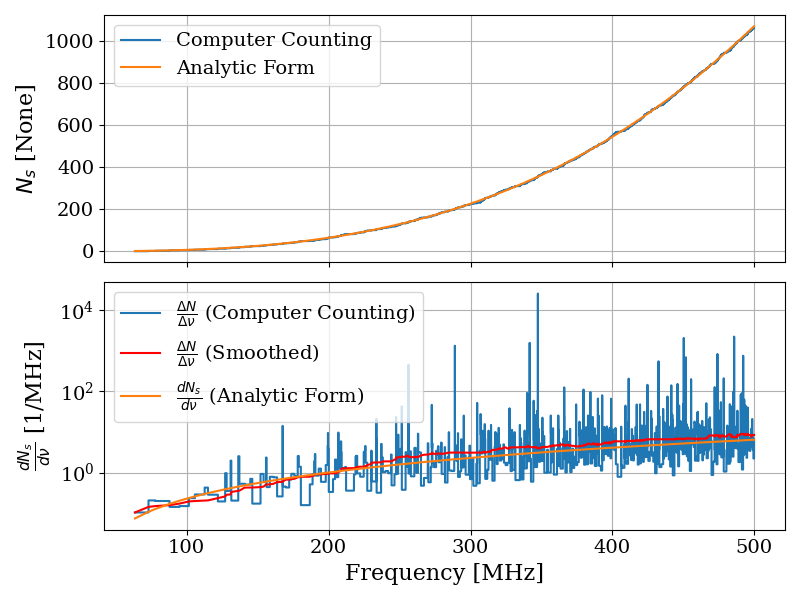

In [79]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal

# Generate the trim indices based on `max_frequency - 100e6`
trim_frequency = max_frequency - 100e6

# Ensure trimmed frequency is defined for all datasets (both cumulative and derivative)
trim_indices_cumulative = sortFreqs < trim_frequency
trim_indices_freq = unique_freqs[:-1] < trim_frequency

# Trim cumulative count and sorted frequencies accordingly
trimmed_sortFreqs = sortFreqs[trim_indices_cumulative]
trimmed_cumulative_modes = np.arange(0, len(sortFreqs), 1)[trim_indices_cumulative]

# Trim data for the derivative calculations
trimmed_freqs = unique_freqs[:-1][trim_indices_freq]
trimmed_dN_df_unique = dN_df_unique[trim_indices_freq]

# Trimmed smoothed data
trimmed_smoothed_dN_df = filtered_dN_df[trim_indices_freq]

# Trim the analytic derivative
trimmed_analytic_dN_df = dmodeCountdNu(trimmed_freqs, a, b, c, cavity_speed_of_light)

# Create a figure with subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6), sharex=True)

# Top subplot: Cumulative Number of Modes
ax1.step(trimmed_sortFreqs / 1e6, trimmed_cumulative_modes, label=r'Computer Counting', where='post')
ax1.plot(trimmed_freqs / 1e6, mode_count_corrected(trimmed_freqs, a, b, c, cavity_speed_of_light), label='Analytic Form')
ax1.set_ylabel(r'$N_s$ [None]')
ax1.legend()
ax1.grid()

# Bottom subplot: Derivative of Mode Count
ax2.step(trimmed_freqs / 1e6, trimmed_dN_df_unique * 1e6, label=r'$\frac{\Delta N}{\Delta \nu}$ (Computer Counting)', where='post')
ax2.plot(trimmed_freqs / 1e6, trimmed_smoothed_dN_df * 1e6, label=r'$\frac{\Delta N}{\Delta \nu}$ (Smoothed)', color='red')
ax2.plot(trimmed_freqs / 1e6, trimmed_analytic_dN_df * 1e6, label=r'$\frac{dN_s}{d\nu}$ (Analytic Form)')

# Customize labels, legend, and grid for the bottom plot
ax2.set_xlabel('Frequency [MHz]')
ax2.set_ylabel(r'$\frac{dN_s}{d\nu}$ [1/MHz]')
ax2.grid()
ax2.legend()
ax2.semilogy()

# Adjust layout to prevent overlap and show the plots
plt.tight_layout()
plt.show()


In [ ]:
resonant_freq_list = []
# Iterate over each frequency and calculate the number of modes
# Iterate through mode numbers (m, n, p) to find modes below given frequency
for m in range(0, 15):  # Adjust range as needed to capture all modes below max_frequency
    for n in range(0, 15):
        for p in range(0, 15):
            # Calculate the resonant frequency for given mode numbers
            resonant_freq = (cavity_speed_of_light / 2) * np.sqrt((m/a)**2 + (n/b)**2 + (p/c)**2)
            if (m > 0) + (n > 0) + (p > 0) >= 2:
                if resonant_freq < 1000e6:
                    resonant_freq_list.append(resonant_freq)

print(len(resonant_freq_list))
plt.close('all')
plt.figure()
plt.hist(resonant_freq_list)


sortFreqs = (np.sort(resonant_freq_list))
plt.figure()
plt.plot(sortFreqs/1e6, (np.arange(0, len(sortFreqs),1)))
plt.scatter(sortFreqs/1e6, (np.arange(0, len(sortFreqs),1)))
plt.plot(frequency_range / 1e6, cumulative_modes, color='blue')
plt.plot(frequency_range/ 1e6, mode_count_corrected(frequency_range, a, b, c, cavity_speed_of_light))
#plt.semilogy()
plt.grid()
print((np.sort(resonant_freq_list)/1e6)[0])

In [136]:
for m in range(0, 3):  # Adjust range as needed to capture all modes below max_frequency
    for n in range(0, 3):
        for p in range(0, 3):
            # Calculate the resonant frequency for given mode numbers
            resonant_freq = (cavity_speed_of_light / 2) * np.sqrt((m/a)**2 + (n/b)**2 + (p/c)**2)
            if resonant_freq <= f:
                if (m > 0) + (n > 0) + (p > 0) >= 2:
                    print(f'f = {np.round(resonant_freq)}, m = {m}, n = {n}, p = {p}')
                    if (m > 0) + (n > 0) + (p > 0) == 3:
                        print('double')

f = 62948474.0, m = 0, n = 1, p = 1
f = 99530276.0, m = 0, n = 1, p = 2
f = 99530276.0, m = 0, n = 2, p = 1
f = 125896947.0, m = 0, n = 2, p = 2
f = 62948474.0, m = 1, n = 0, p = 1
f = 99530276.0, m = 1, n = 0, p = 2
f = 62948474.0, m = 1, n = 1, p = 0
f = 77095820.0, m = 1, n = 1, p = 1
double
f = 109029955.0, m = 1, n = 1, p = 2
double
f = 99530276.0, m = 1, n = 2, p = 0
f = 109029955.0, m = 1, n = 2, p = 1
double
f = 133533878.0, m = 1, n = 2, p = 2
double
f = 99530276.0, m = 2, n = 0, p = 1
f = 125896947.0, m = 2, n = 0, p = 2
f = 99530276.0, m = 2, n = 1, p = 0
f = 109029955.0, m = 2, n = 1, p = 1
double
f = 133533878.0, m = 2, n = 1, p = 2
double
f = 125896947.0, m = 2, n = 2, p = 0
f = 133533878.0, m = 2, n = 2, p = 1
double
f = 154191641.0, m = 2, n = 2, p = 2
double


6036
62.94847369057585


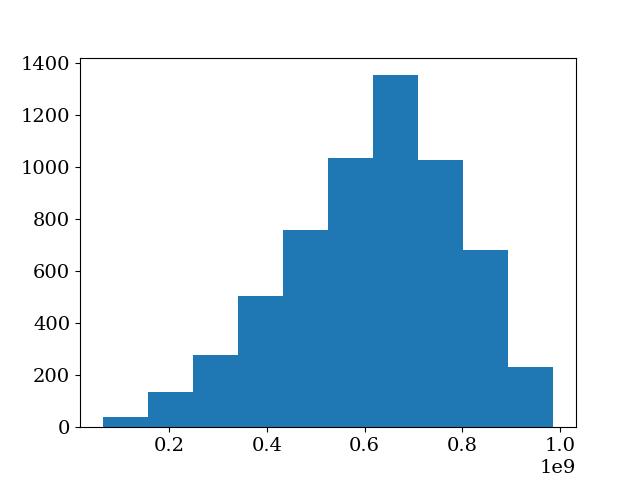

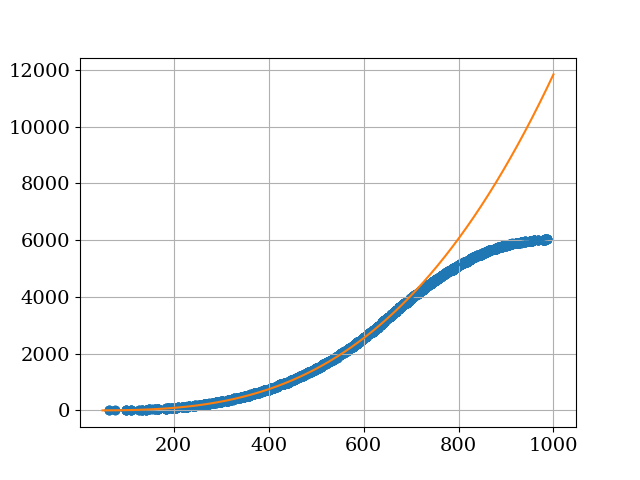

In [110]:
resonant_freq_list = []
# Iterate over each frequency and calculate the number of modes
# Iterate through mode numbers (m, n, p) to find modes below given frequency
for m in range(0, 15):  # Adjust range as needed to capture all modes below max_frequency
    for n in range(0, 15):
        for p in range(0, 15):
            # Calculate the resonant frequency for given mode numbers
            resonant_freq = (cavity_speed_of_light / 2) * np.sqrt((m/a)**2 + (n/b)**2 + (p/c)**2)
            if (m > 0) + (n > 0) + (p > 0) >= 2:
                if resonant_freq < 1000e6:
                    resonant_freq_list.append(resonant_freq)
                    if (m > 0) + (n > 0) + (p > 0) == 3:
                        resonant_freq_list.append(resonant_freq)

print(len(resonant_freq_list))
plt.close('all')


sortFreqs = (np.sort(resonant_freq_list))
plt.figure()
plt.plot(sortFreqs/1e6, (np.arange(0, len(sortFreqs),1)))
plt.scatter(sortFreqs/1e6, (np.arange(0, len(sortFreqs),1)))
#plt.plot(frequency_range / 1e6, cumulative_modes, color='blue')
plt.plot(frequency_range/ 1e6, mode_count_corrected(frequency_range, a, b, c, cavity_speed_of_light))
#plt.semilogy()
plt.grid()
print((np.sort(resonant_freq_list)/1e6)[0])

In [52]:
(cavity_speed_of_light / 2) * np.sqrt((1/3.68)**2 + (1/3.07)**2 + (0/1)**2)

63585704.10302448